# Introductin to neural network classification with tensorflow

#### A neural network is a network of neurons, these neurons take an input and learn from certain features in the input and then produce an output

in this notebook we're going to see how to write neural networks for classification problems

**Classification problems**

The goal of a classification problem is to classify something as one thing or another

**Binary classification**

The goal of a binary classification problem is to classify something as one thing or another

**Multiclass classification**

Multiclass classification is a type of classification problem where the goal is to predict the class of an input sample from a set of more than two possible classes.

**Multilabel classification**

Multilabel classification is commonly used in applications such as image classification, where an image may contain
multiple obiects or attributes that need to be identified.

In [1]:
# Create data to view and fit

from sklearn.datasets import make_circles

# Make 1000 examples

n_samples = 1000

# Create circles

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


### our data is little bit complex so we need to visualize it

In [2]:
# import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
# col 0 is x0 and col 1 is x1

circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


<Axes: xlabel='X0', ylabel='X1'>

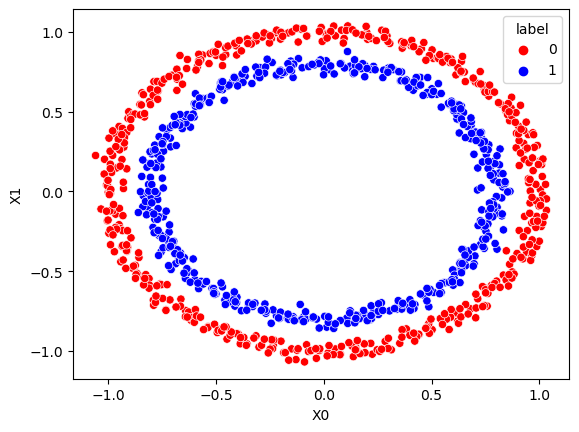

In [4]:
# visualize with a plot
sns.scatterplot(x="X0",y="X1",hue="label",data=circles,palette=["red","blue"])

## input and output shapes

In [5]:
# check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

## steps in modelling

1. get the data ready

2. create a model

3. fit the model

4. evaluate the model

5. improve the model


In [7]:
# set random seed

tf.random.set_seed(42)

# create the model using the sequential API

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

# fit the model

model_1.fit(X,y,epochs=100)



Epoch 1/100


2023-08-11 19:47:01.439228: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 1s 7ms/step - loss: 5.8954 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 5.8884 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 5.8869 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 5.8765 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 5.8655 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 5.8196 - accuracy: 0.4810
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 5.8045 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 5.7676 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 5.6786 - accuracy: 0.4790
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 5.6897 - accuracy: 0.4790
Epoch 11/100
32/32 [=

In [8]:
# summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:

model_1.fit(X,y,epochs=200,verbose=0)
# Evaluate the model
model_1.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 3.5433 - accuracy: 0.4780


[3.543264865875244, 0.4779999852180481]

Since we're working on a binary classification problem and our model is getting 
around 50% accuracy, it's likely our model is predicting 1s and 0s at random.

So how do we improve our model?

**let add an extra layer and increase the number of hidden units in each layer**

In [10]:
# set random seed

tf.random.set_seed(42)

# 1. build the model

model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100), # hidden layer
    tf.keras.layers.Dense(1) # output layer
])

# 2. compile the model

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3. fit the mode

model2.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 2.9533 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8265 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7629 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7375 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7197 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7080 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7010 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 11/

In [11]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 3.5433 - accuracy: 0.4780


[3.543264865875244, 0.4779999852180481]

## improve our model

In [12]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:
# set random seed

tf.random.set_seed(42)

# 1. build the model

model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100), # hidden layer
    tf.keras.layers.Dense(10), # hidden layer
    tf.keras.layers.Dense(1) # output layer
])

# 2. compile the model

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.legacy.Adam(0.01),
               metrics=["accuracy"])

# 3. fit the mode

model3.fit(x_train,y_train,epochs=100)


Epoch 1/100
25/25 [==============================] - 0s 6ms/step - loss: 1.0282 - accuracy: 0.5250
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7059 - accuracy: 0.4775
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7114 - accuracy: 0.4925
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7099 - accuracy: 0.4675
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7086 - accuracy: 0.4638
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7118 - accuracy: 0.4737
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7169 - accuracy: 0.4900
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7068 - accuracy: 0.4613
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7049 - accuracy: 0.4812
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7041 - accuracy: 0.4837
Epoch 11/

In [14]:
model3.evaluate(x_train,y_train)

25/25 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5063


[0.6930484175682068, 0.5062500238418579]

In [15]:
# predictions

y_preds=model3.predict(x_test)

y_preds

7/7 [==============================] - 0s 3ms/step


array([[0.49502736],
       [0.47461239],
       [0.48586372],
       [0.49369168],
       [0.48638722],
       [0.4960243 ],
       [0.49504068],
       [0.489268  ],
       [0.48803318],
       [0.49719495],
       [0.4919381 ],
       [0.47772518],
       [0.49760866],
       [0.46959063],
       [0.49486333],
       [0.4979124 ],
       [0.4936508 ],
       [0.4703873 ],
       [0.4769977 ],
       [0.47823882],
       [0.47708383],
       [0.49078086],
       [0.49622172],
       [0.47369766],
       [0.47101545],
       [0.4965596 ],
       [0.472624  ],
       [0.47213987],
       [0.49515375],
       [0.49476975],
       [0.49790362],
       [0.47291905],
       [0.4768719 ],
       [0.49817955],
       [0.47877097],
       [0.48599184],
       [0.47850493],
       [0.47343448],
       [0.48722184],
       [0.49286896],
       [0.47495922],
       [0.4749052 ],
       [0.47204915],
       [0.4736637 ],
       [0.49454677],
       [0.4975144 ],
       [0.4907347 ],
       [0.483

to visualize our model's predictions, let's create a function `plot_decision_boundary()` to plot and compare them


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, x, y):
    """
    Plot the multiclass decision boundary for a model that accepts 2D inputs.

    Arguments:
    model {function} -- trained model with function model.predict(x_in).
    x {numpy.ndarray} -- 2D inputs with shape (N, 2).
    y {numpy.ndarray} -- 1D outputs with shape (N,).
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Create x value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())




  1/313 [..............................] - ETA: 4s

313/313 [==============================] - 0s 2ms/step
Doing binary classification


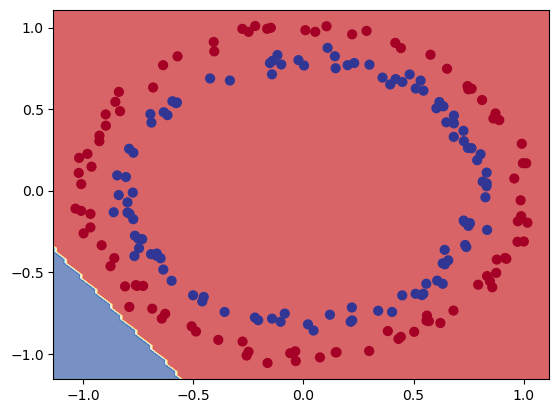

In [17]:
    
# Assuming you have defined `model3`, `x_test`, and `y_test` variables before calling the function.
# Call the function to plot the decision boundary.
plot_decision_boundary(model3, x=x_test, y=y_test)

In [18]:
x_min,x_max=x_test[:,0].min()-0.1,x_test[:,0].max()+0.1
y_min,y_max=x_test[:,1].min()-0.1,x_test[:,1].max()+0.1

x_max,x_min,y_max,y_min

xx,yy=np.meshgrid(
        np.linspace(x_min,x_max,100),
        np.linspace(y_min,y_max,100)
    )

## The missing piece is non-linearity

In [19]:
# set teh random seed
tf.random.set_seed(42)

# 1.create the model
model4=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="linear"),
])

# 2. compile the model

model4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
                metrics=["accuracy"])


# 3. fit the model

model4.fit(x_train,y_train,epochs=100,verbose=0)

/Users/magesh/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
model4.evaluate(x_test,y_test)

7/7 [==============================] - 0s 10ms/step - loss: 0.6956 - accuracy: 0.2300


[0.695553183555603, 0.23000000417232513]

313/313 [==============================] - 0s 1ms/step
Doing multiclass classification


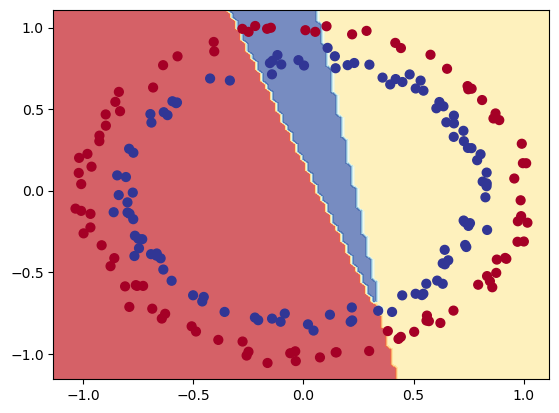

In [21]:
# plot the decision boundary for model4

plot_decision_boundary(model4,x_test,y_test)

## lets try build our first neural network with tensorflow


In [22]:
tf.random.set_seed(42)

# 1.create the model

model5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu"),
])

# 2. compile the model
model5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. fit the model
model5.fit(x_train,y_train,epochs=100,verbose=0)

In [23]:
model5.evaluate(x_test,y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.6955 - accuracy: 0.4500


[0.6954940557479858, 0.44999998807907104]

## let's build the same model using tensorflow's functional API
![tenserflow_play](../notes/images/tenserflow_play.png)

In [24]:
# set random seed
tf.random.set_seed(42)

# 1. create the model

model6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,name="output_layer")

])

# 2. compile the model
model6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. fit the model

model6.fit(x_train,y_train,epochs=300,verbose=2)


Epoch 1/300
25/25 - 0s - loss: 5.6056 - accuracy: 0.4963 - 375ms/epoch - 15ms/step
Epoch 2/300
25/25 - 0s - loss: 3.4579 - accuracy: 0.4787 - 106ms/epoch - 4ms/step
Epoch 3/300
25/25 - 0s - loss: 0.7300 - accuracy: 0.5225 - 101ms/epoch - 4ms/step
Epoch 4/300
25/25 - 0s - loss: 0.7012 - accuracy: 0.4688 - 111ms/epoch - 4ms/step
Epoch 5/300
25/25 - 0s - loss: 0.6940 - accuracy: 0.5100 - 123ms/epoch - 5ms/step
Epoch 6/300
25/25 - 0s - loss: 0.6996 - accuracy: 0.4825 - 118ms/epoch - 5ms/step
Epoch 7/300
25/25 - 0s - loss: 0.6982 - accuracy: 0.4863 - 110ms/epoch - 4ms/step
Epoch 8/300
25/25 - 0s - loss: 0.6963 - accuracy: 0.4750 - 107ms/epoch - 4ms/step
Epoch 9/300
25/25 - 0s - loss: 0.6981 - accuracy: 0.4400 - 104ms/epoch - 4ms/step
Epoch 10/300
25/25 - 0s - loss: 0.6954 - accuracy: 0.4475 - 105ms/epoch - 4ms/step
Epoch 11/300
25/25 - 0s - loss: 0.6960 - accuracy: 0.4888 - 100ms/epoch - 4ms/step
Epoch 12/300
25/25 - 0s - loss: 0.7000 - accuracy: 0.4837 - 103ms/epoch - 4ms/step
Epoch 13/300

In [25]:
model6.evaluate(x_test,y_test)

7/7 [==============================] - 0s 9ms/step - loss: 0.7017 - accuracy: 0.4750


[0.7016985416412354, 0.4749999940395355]

313/313 [==============================] - 0s 1ms/step
Doing binary classification


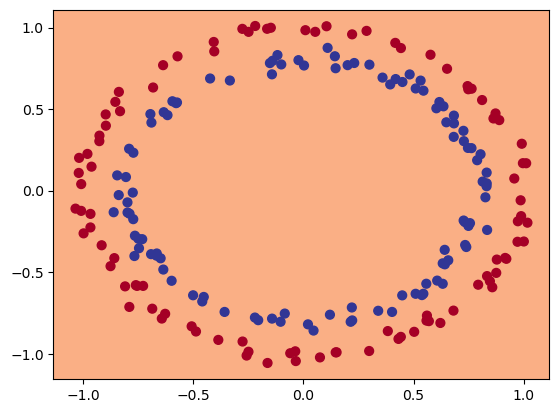

In [26]:
# plot the decision boundary for model6

plot_decision_boundary(model6,x_test,y_test)

## still not good lets give the final try

In [27]:
# set random seed
tf.random.set_seed(42)

# 1. create the model

model7=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. compile the model

model7.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
    metrics=["accuracy"]
)

# 3. fit the model
history=model7.fit(x_train,y_train,epochs=100,verbose=2)


Epoch 1/100
25/25 - 0s - loss: 0.7171 - accuracy: 0.5150 - 384ms/epoch - 15ms/step
Epoch 2/100
25/25 - 0s - loss: 0.7160 - accuracy: 0.5000 - 104ms/epoch - 4ms/step
Epoch 3/100
25/25 - 0s - loss: 0.7115 - accuracy: 0.4950 - 103ms/epoch - 4ms/step
Epoch 4/100
25/25 - 0s - loss: 0.7065 - accuracy: 0.4913 - 105ms/epoch - 4ms/step
Epoch 5/100
25/25 - 0s - loss: 0.7026 - accuracy: 0.4925 - 101ms/epoch - 4ms/step
Epoch 6/100
25/25 - 0s - loss: 0.7002 - accuracy: 0.4988 - 109ms/epoch - 4ms/step
Epoch 7/100
25/25 - 0s - loss: 0.6981 - accuracy: 0.4925 - 104ms/epoch - 4ms/step
Epoch 8/100
25/25 - 0s - loss: 0.6965 - accuracy: 0.4900 - 104ms/epoch - 4ms/step
Epoch 9/100
25/25 - 0s - loss: 0.6961 - accuracy: 0.4875 - 101ms/epoch - 4ms/step
Epoch 10/100
25/25 - 0s - loss: 0.6949 - accuracy: 0.4725 - 105ms/epoch - 4ms/step
Epoch 11/100
25/25 - 0s - loss: 0.6944 - accuracy: 0.4800 - 110ms/epoch - 4ms/step
Epoch 12/100
25/25 - 0s - loss: 0.6948 - accuracy: 0.4737 - 104ms/epoch - 4ms/step
Epoch 13/100

313/313 [==============================] - 0s 1ms/step
Doing binary classification


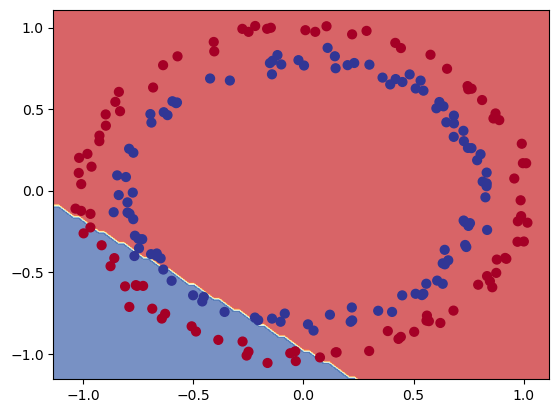

In [30]:
plot_decision_boundary(model7,x_test,y_test)

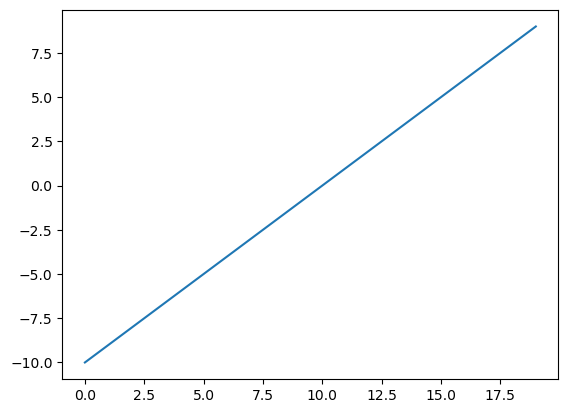

In [31]:
# create a toy a tensor (similar to the data we pass into our model)

toy_tensor = tf.cast(tf.range(-10, 10), tf.float32)

# Visualize our toy tensor

plt.plot(toy_tensor)

 

In [35]:
# lets build our own sigmoid function

def sigmoid(z):
    return 1/(1+np.exp(-z))

# use our sigmoid function on our data

sigmoid_preds = sigmoid(toy_tensor)
sigmoid_preds


array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)

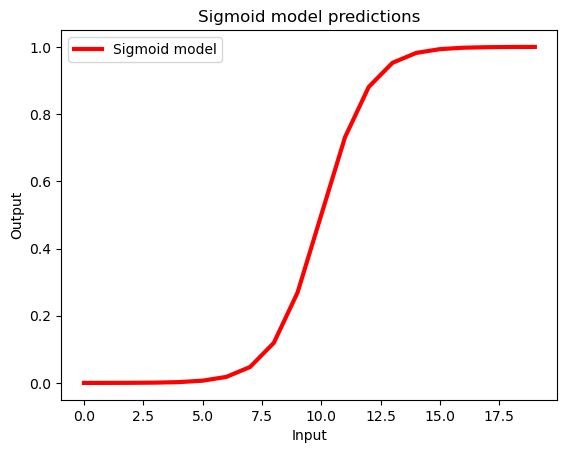

In [43]:
# plot the sigmoid_preds

# plt.plot(toy_tensor,c='b', lw=3, label='Toy model')
plt.plot(sigmoid_preds, c='r', lw=3, label='Sigmoid model')

plt.title('Sigmoid model predictions')
plt.xlabel('Input')
plt.ylabel('Output')

plt.legend()


In [47]:
# Let's recreate the relu function

def relu(x):
	return tf.maximum(0, x)

# pass a toy tensor
relu(toy_tensor)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

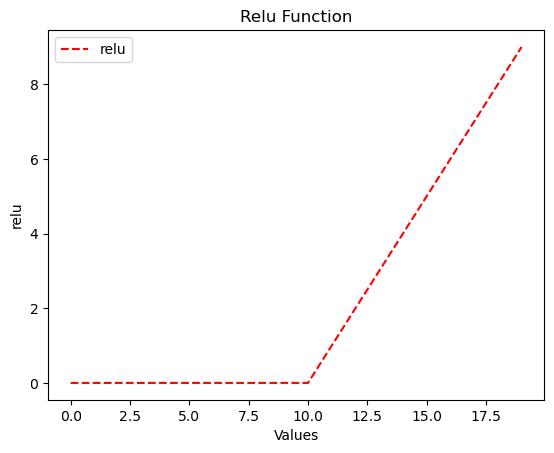

In [57]:
# plot Relu

plt.plot( relu(toy_tensor), label='relu', color='red', linestyle='--' )

plt.xlabel('Values')
plt.ylabel('relu')
plt.title('Relu Function')

plt.legend()

plt.show()

In [58]:
# lets try the linear activation function

tf.keras.activations.linear(toy_tensor)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

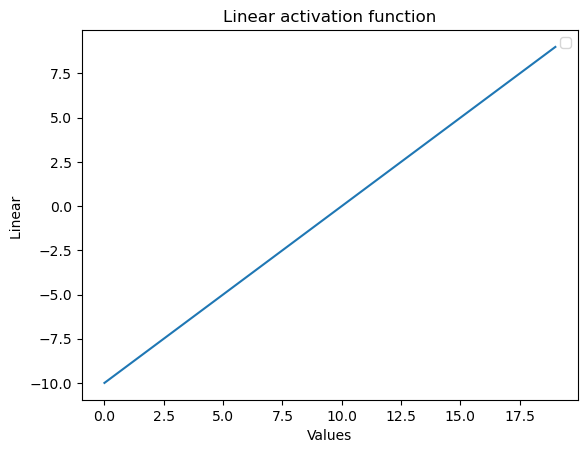

In [60]:
# plot linear activation function

plt.plot(tf.keras.activations.linear(toy_tensor))


plt.xlabel('Values')
plt.ylabel('Linear ')
plt.title('Linear activation function')

plt.legend()

plt.show()